In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [85]:
plt.rcParams['figure.figsize'] = (8,6)

In [86]:
df = pd.read_csv(r"C:\Users\asus\Downloads\BP_data.csv")

In [87]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [88]:
df.shape

(2000, 15)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [90]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [93]:
data = df.drop(['Patient_Number'], axis = 1)

In [94]:
data.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
6,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
15,1,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0
28,1,9.37,0.95,38,11,1,0.0,0,30738,48217,336.0,1,1,1
30,0,14.19,0.37,40,46,1,0.0,0,3922,39971,8.0,3,0,1
35,0,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0


In [95]:
data.shape

(318, 14)

In [96]:
data.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.512579,10.843994,0.499843,34.389937,29.182390,1.0,0.440252,0.462264,23860.078616,25146.110063,260.113208,1.987421,0.506289,0.462264
std,0.500630,1.927853,0.283164,5.877200,12.140531,0.0,0.497200,0.499360,13931.763430,13842.787355,145.257716,0.802106,0.500748,0.499360
min,0.000000,8.130000,0.000000,25.000000,10.000000,1.0,0.000000,0.000000,894.000000,186.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,9.312500,0.270000,29.000000,19.000000,1.0,0.000000,0.000000,12747.500000,13904.250000,140.500000,1.000000,0.000000,0.000000
50%,1.000000,10.555000,0.500000,34.000000,30.000000,1.0,0.000000,0.000000,23194.500000,24991.500000,263.500000,2.000000,1.000000,0.000000
75%,1.000000,11.790000,0.747500,40.000000,39.000000,1.0,1.000000,1.000000,35856.000000,36832.250000,385.500000,3.000000,1.000000,1.000000
max,1.000000,16.070000,1.000000,44.000000,50.000000,1.0,1.000000,1.000000,49806.000000,49956.000000,496.000000,3.000000,1.000000,1.000000


In [97]:
from warnings import filterwarnings
filterwarnings('ignore')

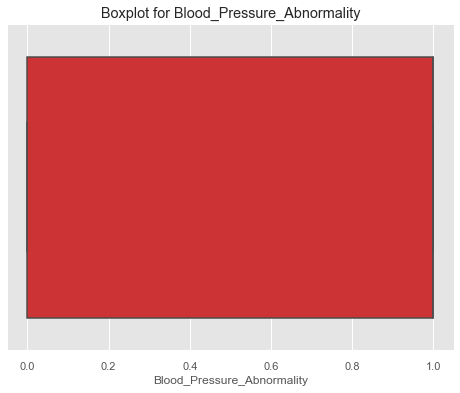

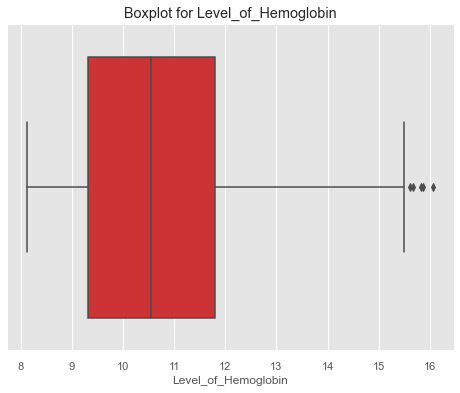

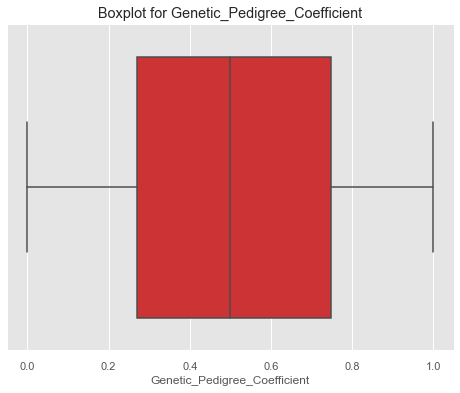

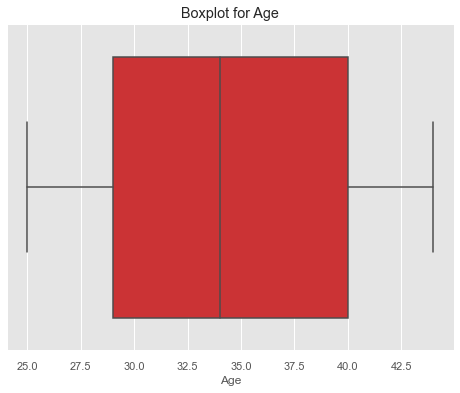

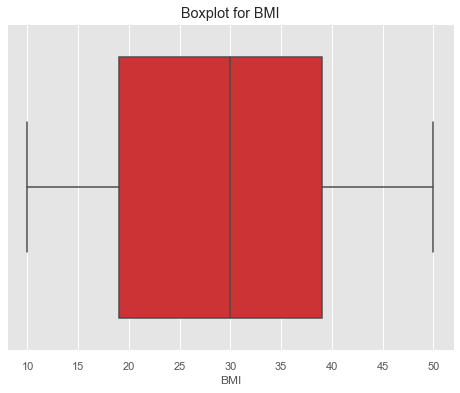

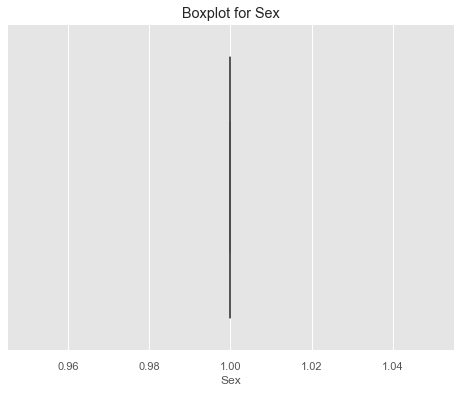

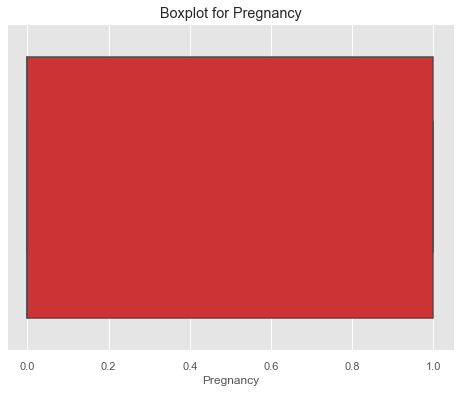

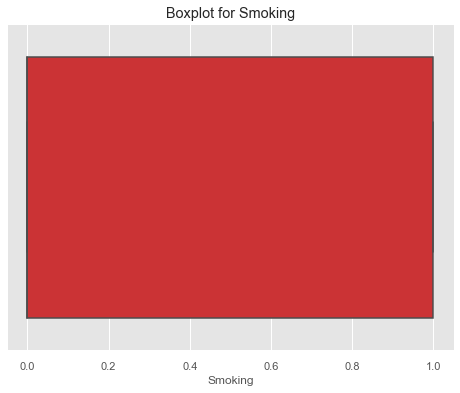

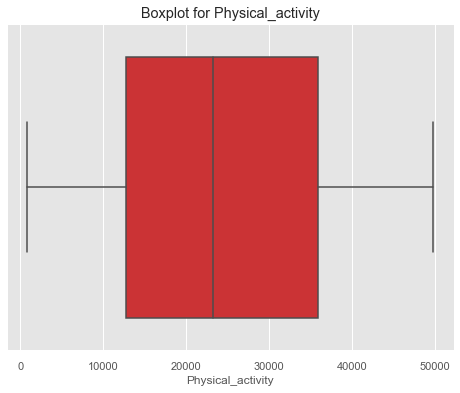

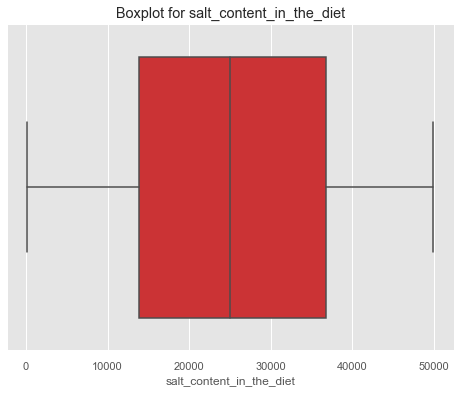

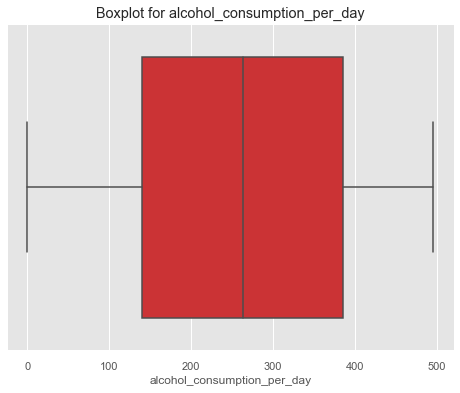

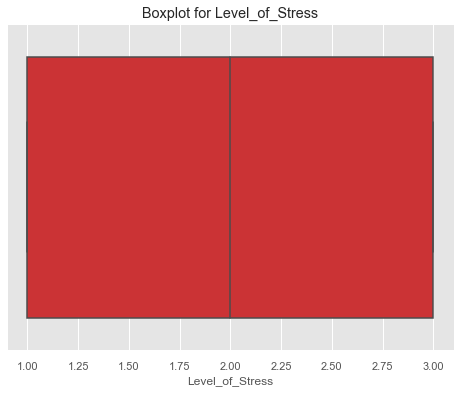

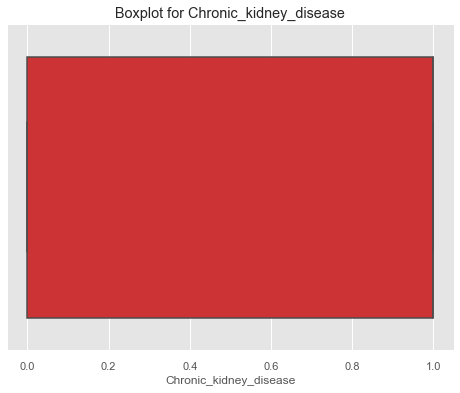

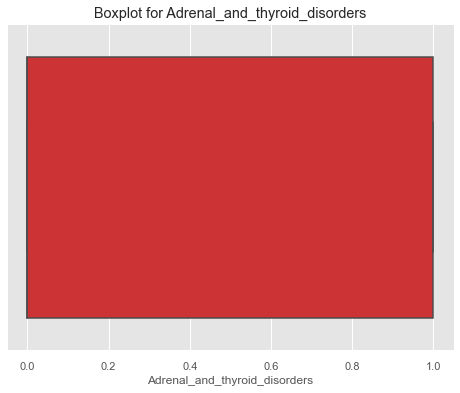

In [98]:
for i in data.columns:
    sns.boxplot(data[i], palette='Set1')
    plt.title('Boxplot for {}'.format(i))
    plt.show()

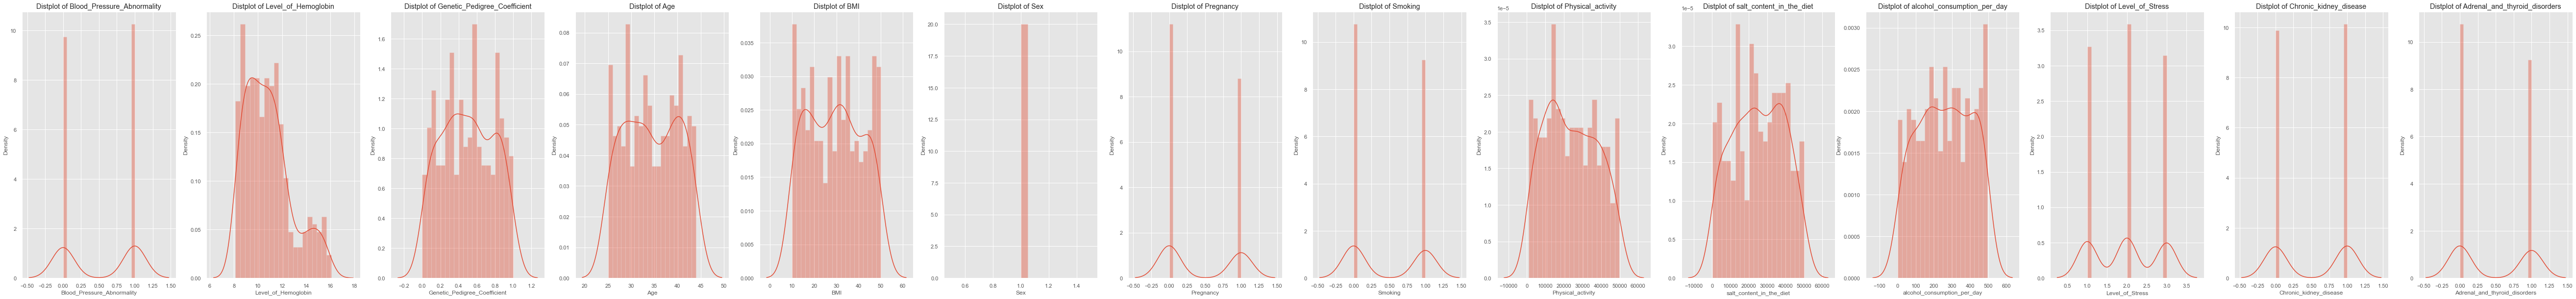

In [99]:
plt.figure(figsize=(100, 10))
n=0
for x in ["Blood_Pressure_Abnormality", "Level_of_Hemoglobin", "Genetic_Pedigree_Coefficient", "Age","BMI","Sex","Pregnancy","Smoking","Physical_activity","salt_content_in_the_diet",          
          "alcohol_consumption_per_day","Level_of_Stress","Chronic_kidney_disease","Adrenal_and_thyroid_disorders"]:
    n += 1
    plt.subplot(1,15,n)
    sns.distplot(data[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

In [100]:
data.drop(["Sex"], axis=1, inplace=True)

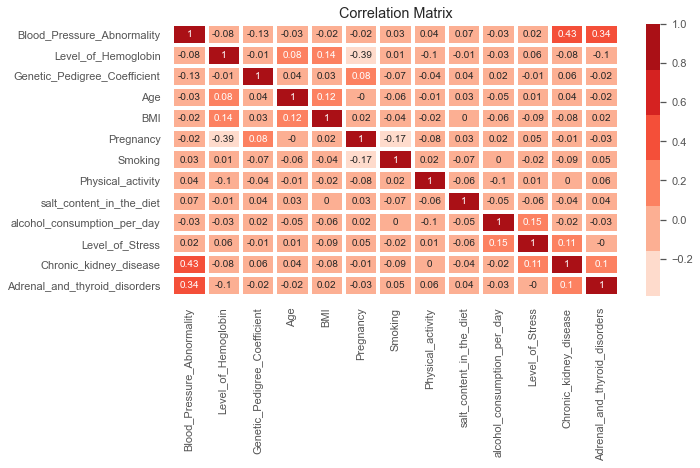

In [101]:
plt.figure(figsize=(10,5))
c = sns.color_palette("Reds")
sns.heatmap(round(data.corr(),2), annot=True, cmap=c, linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

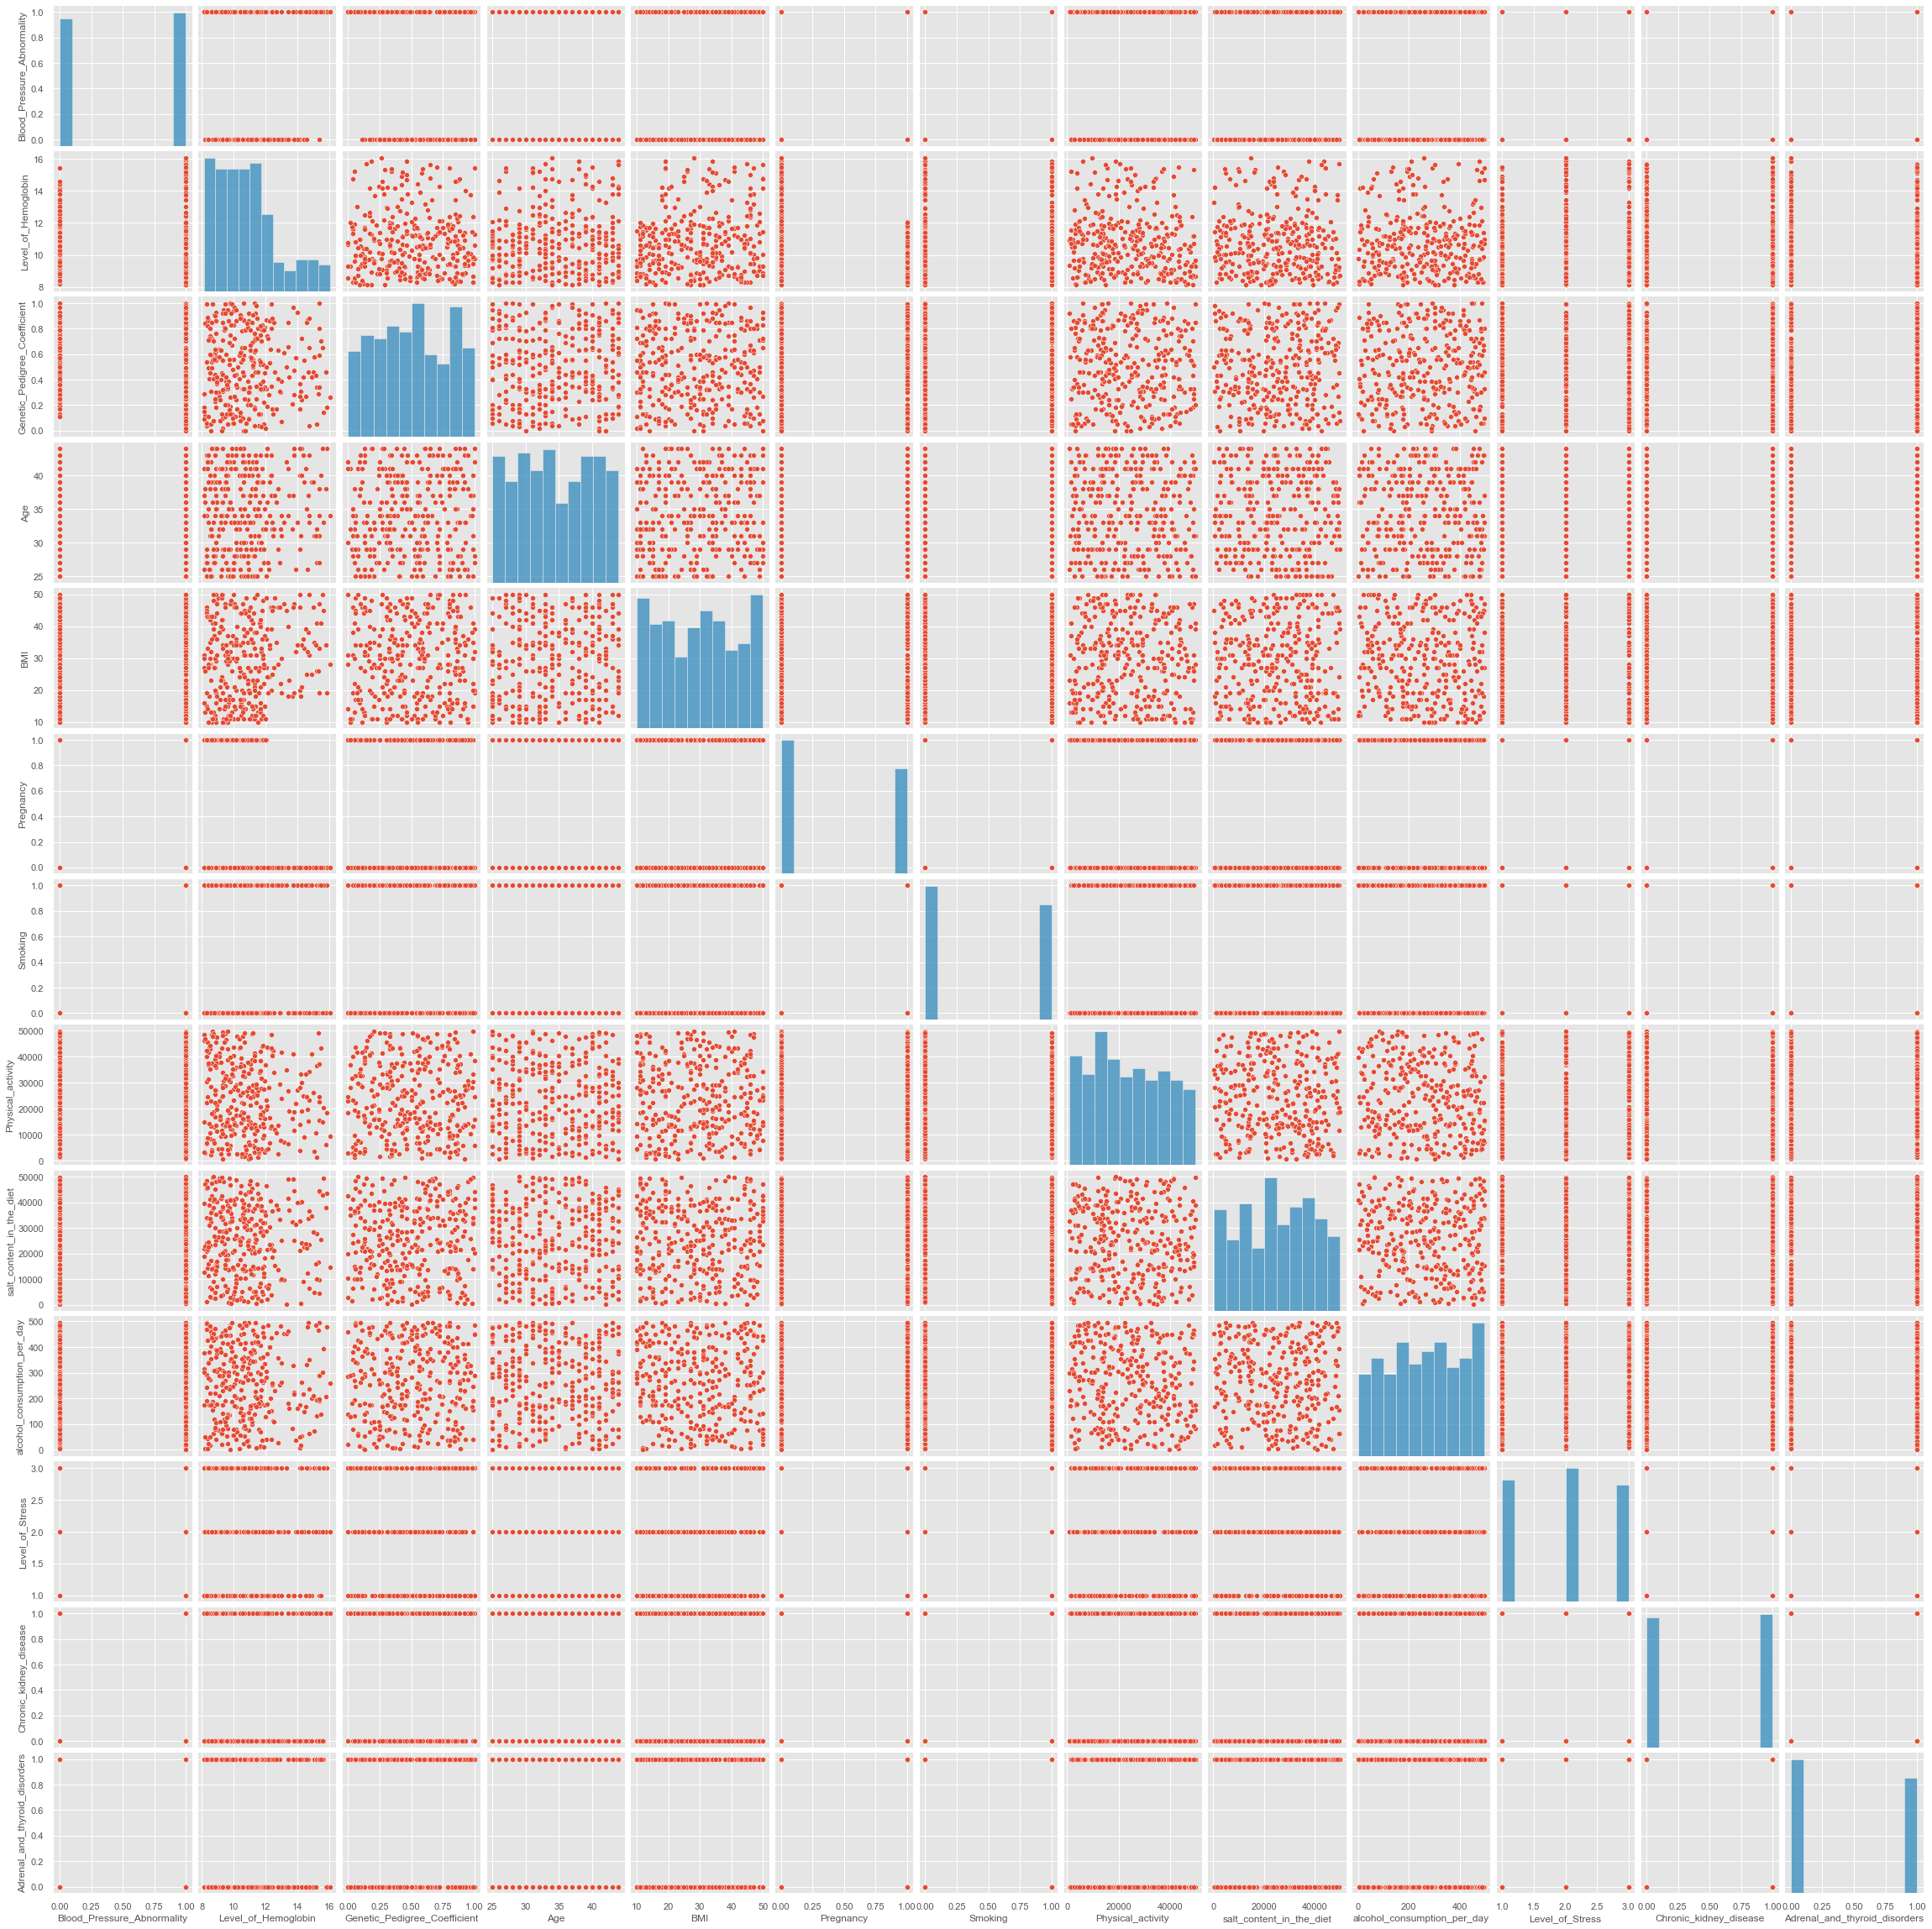

In [102]:
sns.pairplot(data)
plt.show()

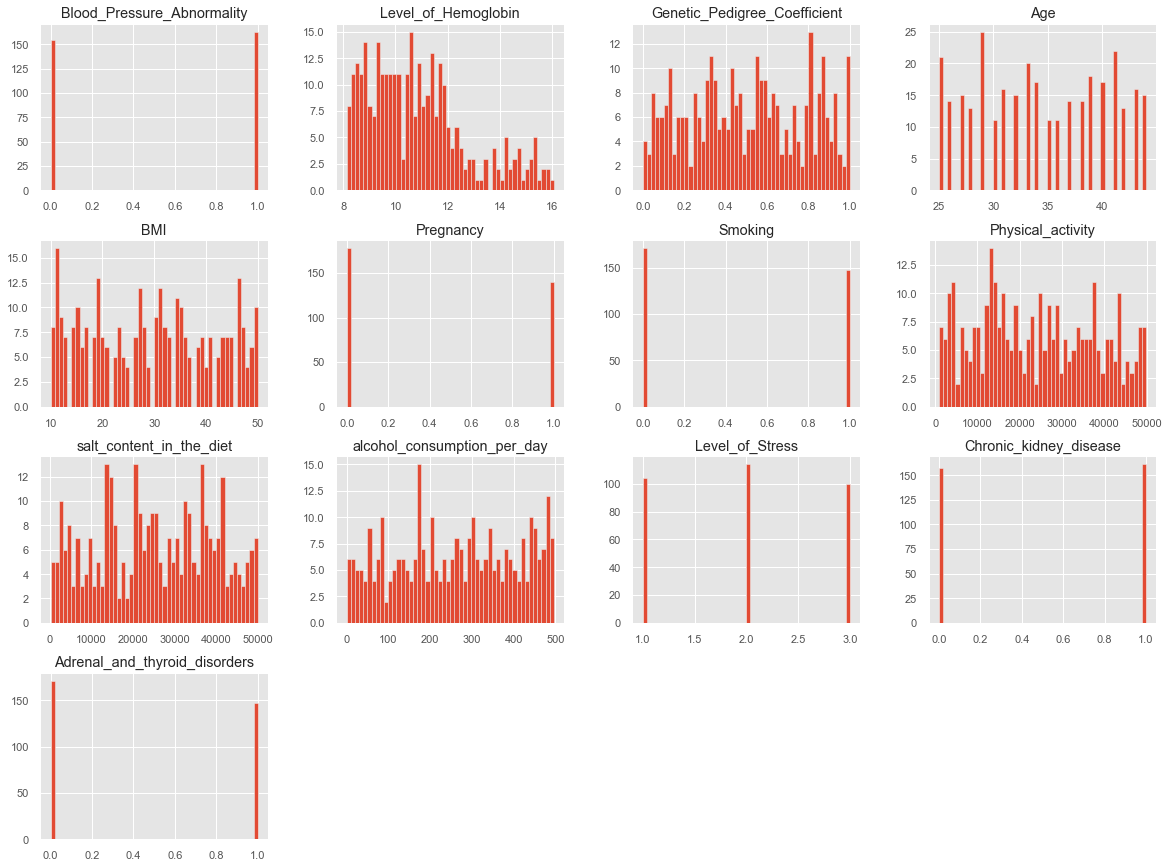

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [104]:
data.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Pregnancy', 'Smoking',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [105]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

In [106]:
X = data.iloc[:, [1,12]].values

In [107]:
for i  in ['single', 'complete', 'average']:
    print('Linkage is', i)
    for j in ['euclidean', 'cityblock', 'cosine']:
            Z= linkage(X, method = i , metric = j)
            c , coph_dist = cophenet(Z, pdist(X))
            print('Cophenetic Distance Correlation Coefficient for', j, 'distance is\t:', c)
    print()
    
Z= linkage(X, 'ward')
c , coph_dist = cophenet(Z, pdist(X))
print('Cophenetic Distance Correlation Coefficient for ward linkage is \t:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.29365756287037836
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.29365756287037836
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.13822837880758992

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.6214491920633095
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.8049664332447795
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.18087384573210188

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8128729426467858
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.8085377630227539
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.1568428321999196

Cophenetic Distance Correlation Coefficient for ward linkage is 	: 0.6183015180571233


In [108]:
wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X, kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(X)
    sil_ag = silhouette_score(X, agc.labels_)
    sil_agc.append(sil_ag)
    
    print('Number of clusters:', i)
    print('KMeans Inertia :', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print()

Number of clusters: 3
KMeans Inertia : 212.42797953627934
Silhouette Score for KMeans: 0.5289963739892305
Silhouette Score for AGC(HCA): 0.5010766094105489

Number of clusters: 4
KMeans Inertia : 152.97611452693283
Silhouette Score for KMeans: 0.45101476964580195
Silhouette Score for AGC(HCA): 0.46441908493140527

Number of clusters: 5
KMeans Inertia : 125.7101660492578
Silhouette Score for KMeans: 0.4075511931555673
Silhouette Score for AGC(HCA): 0.4040612278813411

Number of clusters: 6
KMeans Inertia : 104.22376375520889
Silhouette Score for KMeans: 0.49257197796222824
Silhouette Score for AGC(HCA): 0.3894329219146929

Number of clusters: 7
KMeans Inertia : 85.06169789610149
Silhouette Score for KMeans: 0.5285980348171551
Silhouette Score for AGC(HCA): 0.3990096282399592

Number of clusters: 8
KMeans Inertia : 67.20515289012297
Silhouette Score for KMeans: 0.5262924853386655
Silhouette Score for AGC(HCA): 0.45388435146653733



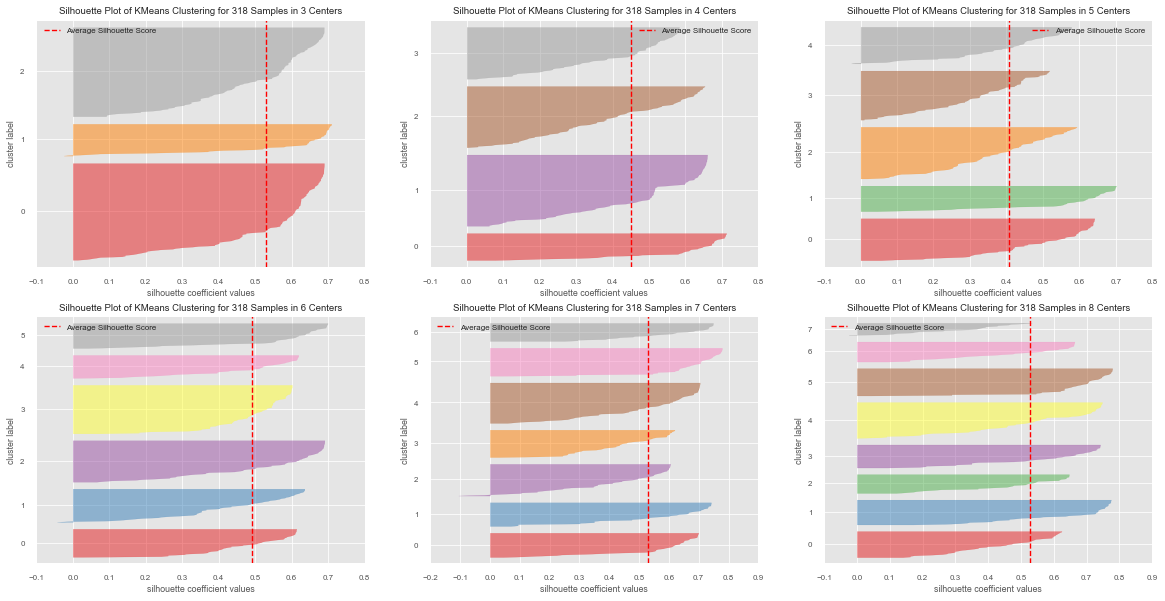

In [109]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.reshape(6)
for i, k in enumerate(range(3, 9)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(X)
    sil.finalize()

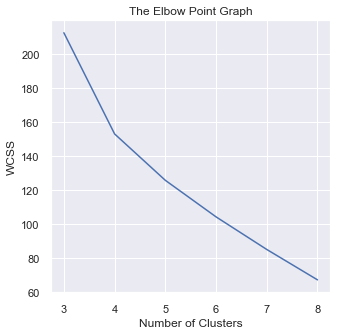

In [110]:
plt.figure(figsize=(5,5))
sns.set()
plt.plot(range(3,9), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 5 4 3 5 5 0 5 5 1 5 5 2 4 3 1 0 2 4 5 3 1 1 0 2 1 1 1 5 3 4 0 3 5 4 3 5
 4 3 5 2 0 3 4 4 0 0 0 3 3 1 1 4 4 3 4 2 0 5 5 1 5 1 4 5 4 4 2 1 2 5 3 1 5
 5 3 5 1 4 4 1 0 0 5 4 5 5 2 5 0 5 4 0 4 2 5 1 1 2 4 4 4 4 4 4 4 0 1 1 3 1
 2 1 4 5 0 4 4 3 0 4 0 4 3 2 1 4 1 3 3 4 4 4 5 4 2 1 2 0 5 0 5 1 4 5 1 2 5
 4 1 5 5 0 2 0 1 0 4 0 3 5 3 5 1 2 3 2 1 5 0 5 1 4 5 4 2 2 4 0 5 4 1 4 0 3
 4 4 0 4 1 3 5 0 4 5 0 2 2 5 3 3 4 4 0 4 4 4 2 1 4 1 4 5 5 3 1 0 5 3 2 5 4
 5 0 5 0 1 3 1 2 4 3 4 0 3 4 0 2 4 1 0 2 1 4 1 5 1 0 4 4 2 1 4 5 2 1 1 2 5
 4 4 3 4 0 5 0 0 1 3 0 4 1 5 3 4 4 5 0 5 4 0 1 4 1 0 1 2 5 5 4 3 2 0 3 1 5
 4 3 5 5 4 1 4 3 3 5 2 4 5 2 5 2 5 4 1 5 3 3]


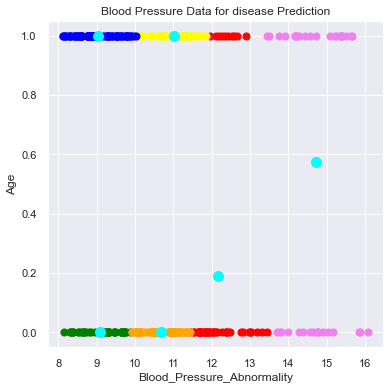

In [112]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 5')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 6')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 7')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='orange', label='Cluster 8')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Blood Pressure Data for disease Prediction')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Age')
plt.show()

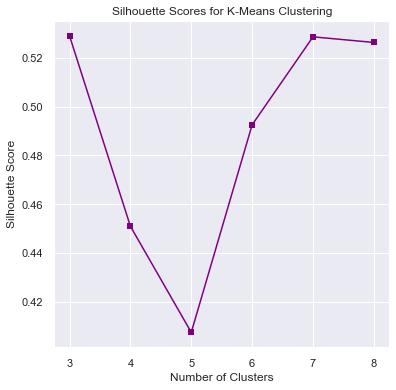

In [113]:
plt.figure(figsize=(6,6))
plt.plot(range(3,9), sil_kmeans, marker='s', c='purple')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

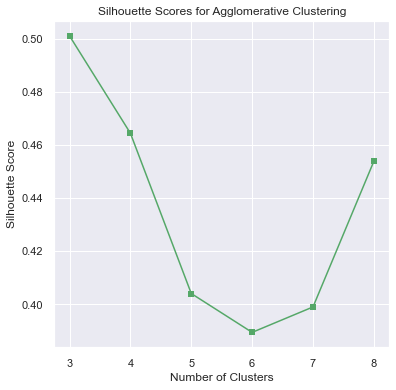

In [114]:
plt.figure(figsize=(6,6))
plt.plot(range(3,9), sil_agc, marker='s', c='g')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [115]:
km_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)             
KM_3 = km_3.fit(X)

In [116]:
KM_3.labels_

array([2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0,

In [117]:
KM_3.cluster_centers_

array([[ 9.18489362,  0.58156028],
       [14.4793617 ,  0.5106383 ],
       [11.32915385,  0.31538462]])

In [118]:
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X)
KM_8 = KMeans(n_clusters = 8, n_init = 100, init='k-means++', random_state = 0).fit(X)

In [119]:
data['cluster_3'] = KM_3.labels_
data['cluster_4'] = KM_4.labels_
data['cluster_5'] = KM_5.labels_
data['cluster_6'] = KM_6.labels_
data['cluster_7'] = KM_7.labels_
data['cluster_8'] = KM_8.labels_

In [120]:
data.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
6,1,11.69,0.75,43,41,1.0,0,38369,32967,206.0,3,1,1,2,3,4,4,6,6
15,1,10.96,0.10,43,27,1.0,0,7329,39018,495.0,1,1,0,2,2,2,2,4,4
28,1,9.37,0.95,38,11,0.0,0,30738,48217,336.0,1,1,1,0,1,3,3,1,3
30,0,14.19,0.37,40,46,0.0,0,3922,39971,8.0,3,0,1,1,0,1,5,0,2
35,0,10.49,0.54,25,16,1.0,0,14798,26236,449.0,3,0,0,2,2,2,2,4,4


In [123]:
# Finding the Segment Distribution for cluster K = 3 :

pd.Series.sort_index(data.cluster_3.value_counts())/sum(data.cluster_3.value_counts())

0    0.443396
1    0.147799
2    0.408805
Name: cluster_3, dtype: float64

In [124]:
# Segment Distribution for cluster K = 4 :

pd.Series.sort_index(data.cluster_4.value_counts())/sum(data.cluster_4.value_counts())

0    0.128931
1    0.336478
2    0.289308
3    0.245283
Name: cluster_4, dtype: float64

In [125]:
# Segment Distribution for cluster K = 5 :

pd.Series.sort_index(data.cluster_5.value_counts())/sum(data.cluster_5.value_counts())

0    0.204403
1    0.125786
2    0.251572
3    0.238994
4    0.179245
Name: cluster_5, dtype: float64

In [127]:
# Segment Distribution for cluster K = 6 :

pd.Series.sort_index(data.cluster_6.value_counts())/sum(data.cluster_6.value_counts())

0    0.141509
1    0.166667
2    0.207547
3    0.242138
4    0.116352
5    0.125786
Name: cluster_6, dtype: float64

In [129]:
# Segment Distribution for cluster K = 7 :

pd.Series.sort_index(data.cluster_7.value_counts())/sum(data.cluster_7.value_counts())

0    0.125786
1    0.122642
2    0.163522
3    0.141509
4    0.207547
5    0.144654
6    0.094340
Name: cluster_7, dtype: float64

In [130]:
# Segment Distribution for cluster K = 8 :

pd.Series.sort_index(data.cluster_8.value_counts())/sum(data.cluster_8.value_counts())

0    0.138365
1    0.132075
2    0.100629
3    0.122642
4    0.188679
5    0.144654
6    0.106918
7    0.066038
Name: cluster_8, dtype: float64

# Profiling

In [132]:
data.cluster_3.size
data.cluster_3.value_counts()

0    141
2    130
1     47
Name: cluster_3, dtype: int64

In [133]:
pd.Series.sort_index(data.cluster_3.value_counts())

0    141
1     47
2    130
Name: cluster_3, dtype: int64

In [137]:
size=pd.concat([pd.Series(data.cluster_3.size), pd.Series.sort_index(data.cluster_3.value_counts()), pd.Series.sort_index(data.cluster_4.value_counts()),
           pd.Series.sort_index(data.cluster_5.value_counts()), pd.Series.sort_index(data.cluster_6.value_counts()),
           pd.Series.sort_index(data.cluster_7.value_counts()), pd.Series.sort_index(data.cluster_8.value_counts())])

In [138]:
size

0    318
0    141
1     47
2    130
0     41
1    107
2     92
3     78
0     65
1     40
2     80
3     76
4     57
0     45
1     53
2     66
3     77
4     37
5     40
0     40
1     39
2     52
3     45
4     66
5     46
6     30
0     44
1     42
2     32
3     39
4     60
5     46
6     34
7     21
dtype: int64

In [140]:
# Segment Size:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/data.cluster_3.size, columns=['Seg_Pct'])

In [141]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.443396,0.147799,0.408805,0.128931,0.336478,0.289308,0.245283,0.204403,0.125786,...,0.144654,0.09434,0.138365,0.132075,0.100629,0.122642,0.188679,0.144654,0.106918,0.066038


In [142]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,318.0,141.000000,47.000000,130.000000,41.000000,107.000000,92.000000,78.000000,65.000000,40.000000,...,46.000000,30.00000,44.000000,42.000000,32.000000,39.000000,60.000000,46.000000,34.000000,21.000000
Seg_Pct,1.0,0.443396,0.147799,0.408805,0.128931,0.336478,0.289308,0.245283,0.204403,0.125786,...,0.144654,0.09434,0.138365,0.132075,0.100629,0.122642,0.188679,0.144654,0.106918,0.066038


In [144]:
data.apply(np.mean).T

Blood_Pressure_Abnormality           0.512579
Level_of_Hemoglobin                 10.843994
Genetic_Pedigree_Coefficient         0.499843
Age                                 34.389937
BMI                                 29.182390
Pregnancy                            0.440252
Smoking                              0.462264
Physical_activity                23860.078616
salt_content_in_the_diet         25146.110063
alcohol_consumption_per_day        260.113208
Level_of_Stress                      1.987421
Chronic_kidney_disease               0.506289
Adrenal_and_thyroid_disorders        0.462264
cluster_3                            0.965409
cluster_4                            1.650943
cluster_5                            2.062893
cluster_6                            2.402516
cluster_7                            2.993711
cluster_8                            3.283019
dtype: float64

In [145]:
data.groupby('cluster_3').apply(np.mean).T

cluster_3,0,1,2
Blood_Pressure_Abnormality,0.652482,0.680851,0.300000
Level_of_Hemoglobin,9.184894,14.479362,11.329154
Genetic_Pedigree_Coefficient,0.492695,0.474468,0.516769
Age,34.113475,35.702128,34.215385
BMI,28.411348,33.553191,28.438462
Pregnancy,0.567376,0.000000,0.461538
Smoking,0.489362,0.489362,0.423077
Physical_activity,25527.439716,22630.553191,22496.153846
salt_content_in_the_diet,25507.290780,26396.276596,24302.384615
alcohol_consumption_per_day,262.723404,252.574468,260.007692


In [151]:
Profiling_output= pd.concat([data.apply(lambda x: x.mean()).T, 
                data.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                data.groupby('cluster_4').apply(lambda x: x.mean()).T,
                data.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                data.groupby('cluster_6').apply(lambda x: x.mean()).T,
                data.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                data.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [152]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Blood_Pressure_Abnormality,0.512579,0.652482,0.680851,0.300000,0.756098,0.728972,0.369565,0.256410,0.846154,0.77500,...,0.869565,0.466667,0.477273,0.190476,0.843750,0.743590,0.300000,0.869565,0.411765,0.285714
Level_of_Hemoglobin,10.843994,9.184894,14.479362,11.329154,14.687073,8.945981,10.440870,11.903077,8.626308,14.71825,...,8.645870,11.226000,9.074773,11.815000,14.964063,9.708462,10.574833,8.645870,11.344412,13.213333
Genetic_Pedigree_Coefficient,0.499843,0.492695,0.474468,0.516769,0.490732,0.498972,0.487283,0.520641,0.504308,0.48650,...,0.463478,0.526667,0.529773,0.537143,0.461250,0.495641,0.485333,0.463478,0.538824,0.487143
Age,34.389937,34.113475,35.702128,34.215385,36.073171,34.158879,34.282609,33.948718,33.953846,36.12500,...,33.913043,34.233333,34.909091,33.785714,36.000000,34.487179,33.766667,33.913043,34.352941,34.761905
BMI,29.182390,28.411348,33.553191,28.438462,33.365854,28.429907,27.826087,29.615385,29.092308,33.75000,...,27.913043,28.733333,29.977273,28.452381,34.093750,26.794872,27.100000,27.913043,29.529412,34.095238
Pregnancy,0.440252,0.567376,0.000000,0.461538,0.000000,0.607477,0.521739,0.346154,0.615385,0.00000,...,0.521739,0.500000,0.659091,0.428571,0.000000,0.589744,0.516667,0.521739,0.441176,0.000000
Smoking,0.462264,0.489362,0.489362,0.423077,0.463415,0.467290,0.434783,0.487179,0.461538,0.47500,...,0.500000,0.400000,0.454545,0.404762,0.500000,0.512821,0.383333,0.500000,0.470588,0.571429
Physical_activity,23860.078616,25527.439716,22630.553191,22496.153846,22409.512195,25903.504673,23768.967391,21926.858974,27091.076923,22295.95000,...,28128.891304,20787.600000,23741.840909,23793.428571,22781.468750,25779.743590,22530.466667,28128.891304,21029.000000,21351.428571
salt_content_in_the_diet,25146.110063,25507.290780,26396.276596,24302.384615,28107.707317,26965.429907,23931.836957,22525.858974,25454.138462,27585.67500,...,24456.891304,25100.966667,28823.068182,23438.428571,25092.281250,26279.589744,22589.366667,24456.891304,25090.676471,27738.809524
alcohol_consumption_per_day,260.113208,262.723404,252.574468,260.007692,234.951220,265.785047,253.826087,272.974359,266.953846,229.30000,...,285.304348,249.933333,262.750000,275.523810,243.156250,249.692308,249.850000,285.304348,247.852941,262.952381


In [153]:
Profiling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

# Adding column names

Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [154]:
Profiling_output_final.to_csv('Profiling_output_final.csv')

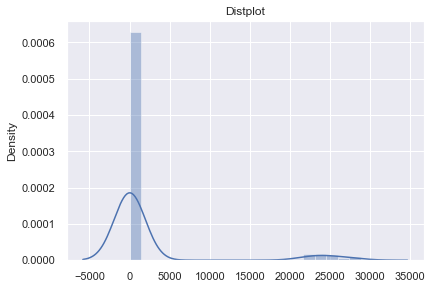

In [155]:
sns.distplot(Profiling_output_final, bins=20)
plt.title('Distplot')
plt.show()